<a href="https://colab.research.google.com/github/TRANTHITHUYTIEN20104061/Tr-n-Th-Th-y-Ti-n-20104061/blob/main/ND_ti%E1%BB%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib 
from glob import glob
from tensorflow.keras.utils import image_dataset_from_directory
import warnings

In [ ]:
import os

labels = os.listdir("/content/drive/MyDrive/Colab Notebooks/BTND/Tien")
labels

['20K', '2K', '100K', '50K', '10K', '1K', '500K', '200K', '200d', '500d', '5K']

In [ ]:
tien_data = plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/Tien/20K/008a5b8885ce45901cdf.jpg')
tien_data
tien_data.shape

(1280, 960, 3)

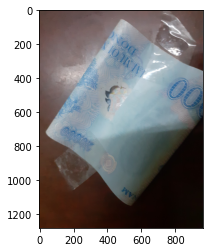

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/Tien/20K/008a5b8885ce45901cdf.jpg'))

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BTND/Tien'
data_dir = pathlib.Path(path)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/BTND/Tien')

In [ ]:
import cv2
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
path

'/content/drive/MyDrive/Colab Notebooks/BTND/Tien'

In [ ]:
labels = ['1K', '2K', '5K','10K','20K','50K','100K','200K','500K','200d','500d']
col_to_title = {'500d': '500d', '200d': '200d','1K': '1K', '2K': '2K', '5K': '5K','10K': '10K', '20K': '20K', '50K': '50K','100K': '100K', '200K': '200K', '500K': '500K'}

In [ ]:
tien_folder = '/content/drive/MyDrive/Colab Notebooks/BTND/Tien'
tien_folder

'/content/drive/MyDrive/Colab Notebooks/BTND/Tien'

In [ ]:
x_train = image_dataset_from_directory(tien_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)
x_test  = image_dataset_from_directory(tien_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)

Found 978 files belonging to 11 classes.
Using 293 files for validation.
Found 978 files belonging to 11 classes.
Using 293 files for validation.


In [ ]:
class_name=x_train.class_names
class_name

['100K', '10K', '1K', '200K', '200d', '20K', '2K', '500K', '500d', '50K', '5K']

In [ ]:
import tensorflow as tf 

AUTOTUNE = tf.data.AUTOTUNE
x_train = x_train.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
x_test = x_test.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_layer=Sequential([layers.RandomFlip(mode='horizontal',input_shape=(128,128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)],name='data_layer')
num_classes=len(class_name)
num_classes

11

In [ ]:
model=Sequential([ data_layer,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=num_classes)])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_layer (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
history = model.fit(x = x_train, epochs = 50, validation_data = x_test)

Epoch 1/50


10/10 [==============================] - 108s 285ms/step - loss: 91.3260 - accuracy: 0.0751 - val_loss: 5.8566 - val_accuracy: 0.0819
Epoch 2/50
10/10 [==============================] - 1s 121ms/step - loss: 3.0949 - accuracy: 0.0717 - val_loss: 2.4040 - val_accuracy: 0.1536
Epoch 3/50
10/10 [==============================] - 1s 121ms/step - loss: 2.3954 - accuracy: 0.1263 - val_loss: 2.3348 - val_accuracy: 0.1536
Epoch 4/50
10/10 [==============================] - 1s 122ms/step - loss: 2.3460 - accuracy: 0.1331 - val_loss: 2.2901 - val_accuracy: 0.1877
Epoch 5/50
10/10 [==============================] - 1s 120ms/step - loss: 2.2909 - accuracy: 0.1502 - val_loss: 2.1794 - val_accuracy: 0.2355
Epoch 6/50
10/10 [==============================] - 1s 121ms/step - loss: 2.2164 - accuracy: 0.2082 - val_loss: 2.1477 - val_accuracy: 0.2560
Epoch 7/50
10/10 [==============================] - 1s 121ms/step - loss: 2.1465 - accuracy: 0.2526 - val_loss: 2.0301 - val_accuracy: 0.3276
Epoch 8/50
10/

10/10 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.8328
Test accuracy: [0.5043976306915283, 0.8327645063400269]
10/10 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.8328
Test accuracy: [0.5043976306915283, 0.8327645063400269]
10/10 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.8328
Test accuracy: [0.5043975710868835, 0.8327645063400269]
10/10 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.8328
Test accuracy: [0.5043975710868835, 0.8327645063400269]
10/10 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.8328
Test accuracy: [0.5043976306915283, 0.8327645063400269]
10/10 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.8328
Test accuracy: [0.5043975710868835, 0.8327645063400269]
10/10 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.8328
Test accuracy: [0.5043976306915283, 0.8327645063400269]

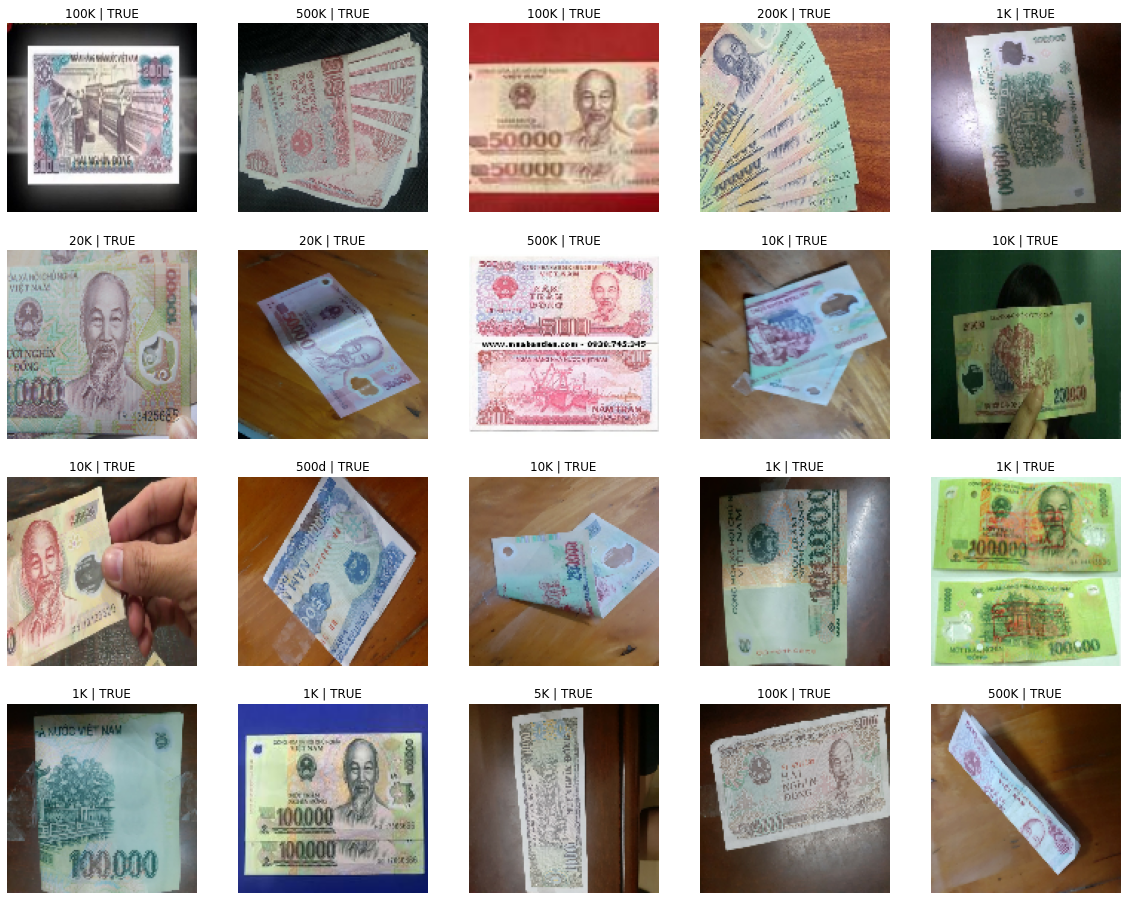

In [ ]:
plt.figure(figsize=(20, 16))
class_names = ['1K', '2K', '5K','10K','20K','50K','100K','200K','500K','200d','500d']
for images, labels in x_test.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            test_acc=model.evaluate(x_test)
            print('Test accuracy:',test_acc)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")